## Currently easy trials are not removed for any plot, however all results are the same if you do remove easy trials

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from cycler import cycler
import popoff
import pop_off_functions as pof
import pop_off_plotting as pop
from Session import SessionLite
from linear_model import PoolAcrossSessions, LinearModel, MultiSessionModel
from utils.utils_funcs import d_prime
from tqdm import tqdm
import svgutils.compose as sc
import IPython.display as ip

/home/tplas/repos/popping-off/popoff/popoff/loadpaths.py
/home/tplas/repos/Vape


In [3]:
pas = PoolAcrossSessions(remove_targets=False, subsample_sessions=False,
                         remove_toosoon=True)

for ss in pas.sessions.values():
    _ = pop.normalise_raster_data(session=ss, sort_neurons=False, filter_150_stim=False)
    

long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
ALERT SESSIONS NOT SUBSAMPLED
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time


In [4]:
# pas.sessions
print(pas.plot_string(is_plot=False))

Hello Adam
Remove targets is False.
Remove too soon is True
Here are the sessions in play:
['Mouse J064, run 10', 'Mouse J064, run 11', 'Mouse J064, run 14', 'Mouse RL070, run 28', 'Mouse RL070, run 29', 'Mouse RL117, run 29', 'Mouse RL117, run 30', 'Mouse RL123, run 22', 'Mouse RL116, run 32', 'Mouse RL116, run 33']
pre-frames spans -0.5 to -0.1 inclusive
post-frames spans 0.83 to 6.0 inclusive


(-0.5, 2.5)

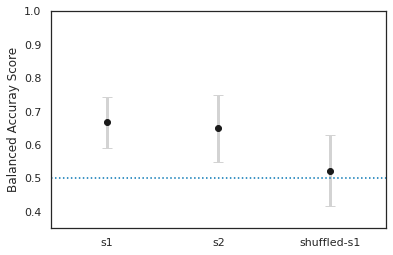

In [96]:
coefs = pas.compare_regions_all_sessions(frames = 'pre', make_plot=True)
plt.ylabel('Balanced Accuray Score')
plt.ylim(0.35, 1)
plt.xlim(-0.5, 2.5)

# save_figure('Figure4_pre-stim-allCellsDecoder_S1S2null')

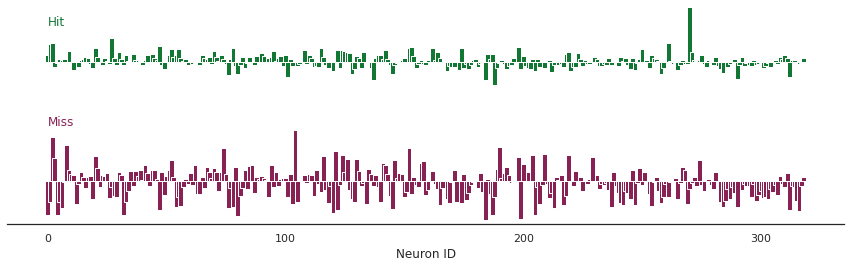

In [12]:
lm = pas.linear_models[0]
pop.firing_rate_dist(lm, region='s1', match_tnums=False, sort=False)
# save_figure('Figure4_firingRateDist')

In [19]:
reg_list = ['s1', 's2']
cov_dicts = {x: {} for x in reg_list}
super_covar_df_dict = {}
for i_reg, reg in enumerate(reg_list):
    print(reg)
    for i_lm, linear_model in tqdm(enumerate(pas.linear_models)):
        cov_dicts[reg][i_lm] = pof.get_covariates(linear_model, reg)

    super_covar_df_dict[reg] = pof.create_df_from_cov_dicts(cov_dicts=cov_dicts[reg], 
                                                  zscore_list=['variance_cell_rates'])

0it [00:00, ?it/s]

s1
new sess
[0.17149786 0.29849032 0.40316756 0.49297246 0.5776675  0.6566079
 0.72881517 0.79648141 0.85413247 0.9078353  0.95637122 1.
 1.        ]
[0.14715543 0.25602539 0.36336924 0.45719396 0.54240188 0.62512772
 0.7037531  0.77279597 0.83860845 0.90023759 0.95456367 1.
 1.        ]
[0.16438007 0.27374211 0.38135713 0.46915079 0.55576236 0.64036785
 0.71157541 0.78190085 0.84369645 0.89935583 0.953825   1.
 1.        ]
[0.15889086 0.27305496 0.37363068 0.46805917 0.55774773 0.64167215
 0.71442851 0.78196642 0.84502391 0.90168073 0.95240129 1.
 1.        ]
[0.14041397 0.27124008 0.38583042 0.48174278 0.56349495 0.64469102
 0.72289975 0.79210096 0.85479445 0.91016177 0.95956735 1.
 1.        ]
[0.15739995 0.27081538 0.3808728  0.48474867 0.57477549 0.64817724
 0.71768728 0.78292889 0.84212079 0.89981436 0.9533647  1.
 1.        ]
[0.13570746 0.25815678 0.36165812 0.45720435 0.54972057 0.63124635
 0.70488014 0.77504827 0.8396385  0.89785055 0.94979591 1.
 1.        ]
[0.14068014 0.25

1it [00:07,  7.34s/it]

new sess
[0.1267522  0.2350206  0.33931383 0.43392328 0.52045666 0.60357825
 0.68393722 0.75881717 0.82544651 0.89074658 0.94705172 1.
 1.        ]
[0.13276554 0.25251082 0.34779114 0.44046912 0.5262723  0.60946355
 0.68562098 0.75516995 0.82181901 0.88476245 0.94419186 1.
 1.        ]
[0.13218387 0.23802102 0.33307576 0.42358565 0.51059487 0.59581046
 0.67651166 0.74912036 0.8170653  0.88367994 0.94349624 1.
 1.        ]
[0.12599096 0.23570227 0.34192062 0.44351083 0.53285623 0.61412802
 0.68670429 0.7579705  0.82280017 0.88467426 0.94517696 1.
 1.        ]
[0.12518048 0.23678489 0.34333762 0.44223185 0.53253164 0.61486074
 0.69131957 0.76315207 0.8319408  0.89213044 0.94766192 1.
 1.        ]
[0.11850875 0.22246307 0.32270917 0.42079754 0.51334162 0.5992737
 0.6780243  0.75049504 0.81846946 0.88043889 0.94202811 1.
 1.        ]
[0.13858329 0.2623264  0.36427534 0.46059991 0.54502774 0.62918775
 0.70230129 0.77160502 0.83731616 0.89569183 0.95005526 1.
 1.        ]
[0.12105575 0.23563

2it [00:17,  9.21s/it]

new sess
[0.10850902 0.21377172 0.31689052 0.41546679 0.50636354 0.58703391
 0.66499245 0.74090314 0.81057724 0.87936601 0.94390793 1.
 1.        ]
[0.11277219 0.22179385 0.3185644  0.41127771 0.49867098 0.58305727
 0.6611008  0.73566198 0.80422051 0.87147794 0.93855948 1.
 1.        ]
[0.13217179 0.23838988 0.33375403 0.42864906 0.51516904 0.60021926
 0.67905816 0.74959901 0.8191213  0.88354504 0.94192253 1.
 1.        ]
[0.12469994 0.23413157 0.33061121 0.42462515 0.51050989 0.59562089
 0.6742931  0.74824073 0.81809138 0.88413085 0.94631021 1.
 1.        ]
[0.11553351 0.22349336 0.32441755 0.42008285 0.51013962 0.59729788
 0.67925048 0.7590865  0.8257192  0.88844779 0.94744202 1.
 1.        ]
[0.11890863 0.22215432 0.32257657 0.41808597 0.5076219  0.59052543
 0.67123918 0.74583587 0.81651403 0.88306102 0.94209763 1.
 1.        ]
[0.14531584 0.26215785 0.3597355  0.45291869 0.54271461 0.62494411
 0.70170745 0.77278126 0.83652016 0.89439739 0.94780904 1.
 1.        ]
[0.11197864 0.2185

3it [00:30, 10.61s/it]

new sess
[0.12987444 0.25144127 0.36039276 0.45732607 0.54464538 0.62678662
 0.70501302 0.77686418 0.84235965 0.90364835 0.95590377 1.
 1.        ]
[0.14009084 0.25726673 0.35842639 0.45771204 0.54800201 0.63032458
 0.70583079 0.77462936 0.83757668 0.89941621 0.95612762 1.
 1.        ]
[0.15181225 0.25623062 0.35390346 0.44911734 0.54252094 0.62413029
 0.70104224 0.77202745 0.83966854 0.90064605 0.95201628 1.
 1.        ]
[0.13685077 0.26015481 0.37586397 0.47383357 0.55786413 0.63716889
 0.7095637  0.77789779 0.8444079  0.90398167 0.95522813 1.
 1.        ]
[0.13969142 0.25864952 0.36572457 0.4632632  0.55083948 0.63568884
 0.70698962 0.77699887 0.83895692 0.90050407 0.95132781 1.
 1.        ]
[0.12420018 0.2425292  0.34282753 0.4403216  0.52866602 0.61066887
 0.68713792 0.76088684 0.82807929 0.89151832 0.94664431 1.
 1.        ]
[0.13122607 0.24861498 0.3546615  0.4545331  0.54806262 0.63659758
 0.71143749 0.78195187 0.84269333 0.89969836 0.95185785 1.
 1.        ]
[0.1261749  0.2432

[0.13068638 0.25454639 0.37195013 0.47154695 0.56524434 0.65037553
 0.72257892 0.78736185 0.84677057 0.90195463 0.95329759 1.
 1.        ]
[0.12564814 0.24910086 0.35634467 0.45924175 0.55262194 0.63295883
 0.70860036 0.7763023  0.83907557 0.8978078  0.95148631 1.
 1.        ]
[0.13146421 0.24970274 0.35519691 0.45023116 0.54013035 0.62330833
 0.6979525  0.76892295 0.83724723 0.89950072 0.95235833 1.
 1.        ]
[0.12958701 0.25111169 0.35935336 0.45369721 0.53692233 0.61626837
 0.69383069 0.76609045 0.83249893 0.89461498 0.95106707 1.
 1.        ]
[0.12952626 0.25394971 0.36826639 0.47167629 0.56427947 0.6464374
 0.71847527 0.78860979 0.84780856 0.90328258 0.95722569 1.
 1.        ]
[0.14764248 0.26552487 0.37392759 0.46814805 0.55183222 0.62846438
 0.70237267 0.77132616 0.8355074  0.89641796 0.95269238 1.
 1.        ]
[0.14427409 0.2637268  0.36136571 0.45549745 0.54231404 0.62427232
 0.70359467 0.77740984 0.84190843 0.90247653 0.95662489 1.
 1.        ]
[0.13949185 0.25631394 0.362

4it [00:48, 13.60s/it]

new sess
[0.12645482 0.24679907 0.35580202 0.45127462 0.54280077 0.62280636
 0.69771023 0.76838942 0.83111271 0.89268177 0.94942474 1.
 1.        ]
[0.12507779 0.24283908 0.34306083 0.43772091 0.52644314 0.61233525
 0.69058327 0.7641565  0.83471316 0.89286968 0.94854709 1.
 1.        ]
[0.12496447 0.22675864 0.32305355 0.4178292  0.50712167 0.58901936
 0.66858289 0.74258778 0.81082604 0.87654773 0.94064078 1.
 1.        ]
[0.13423028 0.24606806 0.34880542 0.43945135 0.52373647 0.60495633
 0.68161961 0.7510875  0.81855634 0.88196168 0.94163532 1.
 1.        ]
[0.13308314 0.24420231 0.34952083 0.44662599 0.53810539 0.62237257
 0.69993663 0.77506468 0.8392444  0.89640302 0.95197807 1.
 1.        ]
[0.12266323 0.24213652 0.34202243 0.43904029 0.52535107 0.60751598
 0.685567   0.76077524 0.82557178 0.88676915 0.94658134 1.
 1.        ]
[0.122578   0.23566913 0.33930374 0.43553145 0.52148864 0.60396781
 0.68201346 0.75547786 0.82525068 0.88958734 0.94723471 1.
 1.        ]
[0.12572574 0.2436

 1.        ]
[0.12775628 0.23715031 0.34146165 0.44007125 0.53457544 0.62310563
 0.70345624 0.77142673 0.83639966 0.89831392 0.95386306 1.
 1.        ]
[0.12632016 0.24311247 0.35322075 0.44965607 0.53724701 0.62323271
 0.70145224 0.77766956 0.84404715 0.90306407 0.95528751 1.
 1.        ]
[0.1324552  0.24828667 0.35730497 0.45324531 0.5371663  0.61706768
 0.69246288 0.76441202 0.82860016 0.8905461  0.94577403 1.
 1.        ]
[0.11957008 0.22830314 0.33482534 0.43417433 0.52738409 0.61021589
 0.68943149 0.76112057 0.82886145 0.88931751 0.94705881 1.
 1.        ]
[0.12914629 0.2482248  0.35409319 0.44845882 0.53420542 0.61368018
 0.68996025 0.76369832 0.83297006 0.89255919 0.94896144 1.
 1.        ]
[0.14027017 0.24870475 0.35113846 0.44420272 0.53144796 0.61148621
 0.69050598 0.76588129 0.83224379 0.89426975 0.94935682 1.
 1.        ]
[0.12041757 0.23804134 0.34494574 0.43756883 0.52200072 0.605126
 0.68203836 0.75630956 0.82810576 0.89110715 0.94726631 1.
 1.        ]
[0.1316515  0.24

5it [01:02, 13.98s/it]

new sess
[0.12607433 0.24676818 0.34426869 0.43757208 0.52457928 0.60777758
 0.68618341 0.75897315 0.82834404 0.89016423 0.95092094 1.
 1.        ]
[0.13387076 0.25429254 0.35272101 0.44181901 0.5277843  0.61026819
 0.6896334  0.76425614 0.83078505 0.89522735 0.94997973 1.
 1.        ]
[0.1229605  0.23574594 0.33978885 0.43711161 0.5258023  0.61111322
 0.69091599 0.76507698 0.83196829 0.89234176 0.94722803 1.
 1.        ]
[0.12692583 0.24094808 0.34699661 0.43605727 0.52418584 0.60655247
 0.687382   0.75878174 0.82436372 0.88607311 0.9460307  1.
 1.        ]
[0.11511544 0.2236282  0.32531862 0.42426644 0.52107987 0.61023068
 0.69274273 0.76802821 0.83752028 0.89813666 0.94987133 1.
 1.        ]
[0.14108259 0.25747998 0.36525849 0.45960871 0.54279398 0.62211609
 0.69962199 0.76782337 0.83579583 0.89292001 0.94846015 1.
 1.        ]
[0.12967526 0.25035613 0.35992134 0.46206805 0.55367691 0.63340984
 0.70930914 0.78240362 0.8477345  0.90934664 0.95879894 1.
 1.        ]
[0.12163984 0.2330

 1.        ]
[0.12177754 0.23384585 0.33855013 0.43841621 0.52459253 0.60339875
 0.67924023 0.7517161  0.8229963  0.88514563 0.945009   1.
 1.        ]
[0.12940904 0.25182564 0.36247939 0.46336643 0.5491316  0.62811652
 0.69962113 0.76594883 0.83088846 0.89206793 0.94904542 1.
 1.        ]
[0.13516253 0.25372293 0.3554253  0.44445041 0.52990337 0.6109545
 0.68650025 0.760691   0.82769865 0.89257348 0.95305185 1.
 1.        ]
[0.11908702 0.23261493 0.34384694 0.44025868 0.52804207 0.61251339
 0.69009828 0.7625202  0.83090555 0.89515642 0.95039051 1.
 1.        ]
[0.12241346 0.23259249 0.33922697 0.43654089 0.52311488 0.60620855
 0.68672436 0.75756491 0.82441004 0.8881011  0.9474706  1.
 1.        ]
[0.12705926 0.24645045 0.34946889 0.44714679 0.54084089 0.61686363
 0.69118643 0.76012053 0.8262728  0.88909132 0.94603391 1.
 1.        ]
[0.12885836 0.24927067 0.35614008 0.45667199 0.54042476 0.61918986
 0.69517228 0.76813811 0.83176405 0.89010846 0.94709051 1.
 1.        ]
[0.12863197 0.2

6it [01:14, 12.98s/it]

new sess
[0.14358902 0.27582148 0.37944041 0.4727177  0.55348746 0.63365804
 0.70490761 0.77030586 0.8336427  0.89232426 0.94709769 1.
 1.        ]
[0.12692689 0.23749532 0.34192088 0.43301409 0.52215614 0.60671707
 0.68409098 0.75730838 0.82738031 0.88857015 0.94580224 1.
 1.        ]
[0.11807795 0.22428276 0.3223896  0.4166829  0.5095185  0.59273486
 0.67242204 0.74933301 0.82116641 0.88680077 0.95001793 1.
 1.        ]
[0.12561476 0.23970578 0.34238467 0.44457127 0.53788151 0.62091035
 0.70056234 0.76929209 0.83132358 0.88906801 0.94530773 1.
 1.        ]
[0.12943728 0.23854749 0.33680266 0.43103323 0.52438324 0.610626
 0.68907216 0.76179555 0.82846422 0.89268712 0.9471932  1.
 1.        ]
[0.12154592 0.23179127 0.33061919 0.42288897 0.51349469 0.59631425
 0.67615008 0.75319391 0.82136411 0.88891366 0.94672399 1.
 1.        ]
[0.13717276 0.24432765 0.3449791  0.43595321 0.52596946 0.60837759
 0.68734807 0.76352437 0.82832965 0.88810349 0.94687871 1.
 1.        ]
[0.11429389 0.222413

7it [01:23, 11.74s/it]

new sess
[0.13983872 0.25250055 0.35274979 0.44597953 0.53380472 0.61889426
 0.69610041 0.76761312 0.83224023 0.89598033 0.94964119 1.
 1.        ]
[0.131379   0.25593326 0.35872424 0.4506848  0.53993346 0.62138942
 0.69579215 0.76305947 0.82826419 0.89049573 0.94884243 1.
 1.        ]
[0.13654042 0.25400057 0.36186918 0.46373093 0.55931823 0.64234647
 0.71979651 0.78331533 0.84513711 0.90445517 0.95363027 1.
 1.        ]
[0.13229913 0.24880215 0.3598695  0.46441516 0.55151502 0.63306838
 0.71032518 0.7836576  0.84306618 0.90078741 0.95109102 1.
 1.        ]
[0.12757701 0.24945676 0.35286815 0.4492781  0.5401904  0.62654967
 0.70708645 0.780241   0.84597721 0.90538227 0.9559322  1.
 1.        ]
[0.12864044 0.25289969 0.35845862 0.46070452 0.55118698 0.63496571
 0.71175819 0.77861422 0.84107914 0.89757925 0.95298517 1.
 1.        ]
[0.14584996 0.25348366 0.35418729 0.44642032 0.53596082 0.61956194
 0.70065331 0.77375119 0.83800473 0.89635081 0.95145501 1.
 1.        ]
[0.13266989 0.2429

8it [01:32, 10.99s/it]

new sess
[0.1404668  0.2558319  0.35894146 0.45254389 0.54369403 0.62627197
 0.70467777 0.77707507 0.84348331 0.90594295 0.95557252 1.
 1.        ]
[0.13392714 0.2548702  0.36415892 0.46162705 0.55209145 0.63216282
 0.70370299 0.77264038 0.83736495 0.89549926 0.94861388 1.
 1.        ]
[0.14267369 0.26732953 0.38917889 0.48043857 0.56710455 0.64477756
 0.71348872 0.77932612 0.84079839 0.90142614 0.95620179 1.
 1.        ]
[0.16077375 0.28022346 0.390013   0.48121779 0.56692801 0.64517863
 0.71630948 0.78196568 0.84584187 0.90201511 0.95353219 1.
 1.        ]
[0.12732331 0.24896629 0.36637587 0.47634932 0.57016019 0.64844586
 0.72042094 0.78727784 0.84833557 0.90770505 0.95763114 1.
 1.        ]
[0.13812868 0.25592446 0.36407746 0.46237735 0.55309701 0.6362066
 0.71360148 0.78097227 0.84062062 0.89787922 0.95179334 1.
 1.        ]
[0.11638596 0.2316749  0.34001014 0.4405505  0.53171352 0.61755865
 0.69492695 0.76736791 0.83452957 0.89501006 0.95079379 1.
 1.        ]
[0.15131076 0.26581

9it [01:40, 10.10s/it]

new sess
[0.14449915 0.26006986 0.36851574 0.46860632 0.55919964 0.63609868
 0.71046691 0.77790693 0.84165503 0.90033857 0.95659446 1.
 1.        ]
[0.12826709 0.24897202 0.36091101 0.45511636 0.54494953 0.62631841
 0.69999692 0.76734    0.83211815 0.89084396 0.9474335  1.
 1.        ]
[0.13528966 0.2536703  0.36053162 0.45608044 0.54311027 0.6246615
 0.70037356 0.77090565 0.8397769  0.89849552 0.95184448 1.
 1.        ]
[0.13893636 0.26025397 0.3737963  0.46909008 0.55240511 0.6336141
 0.71098703 0.78339039 0.84956404 0.9089191  0.96076354 1.
 1.        ]
[0.12977636 0.2421944  0.34725211 0.44165254 0.53164392 0.61510638
 0.69473331 0.76482754 0.83130685 0.89352331 0.94998158 1.
 1.        ]
[0.1280414  0.24358883 0.35074078 0.44132973 0.52985678 0.61486465
 0.69681809 0.76708183 0.83162952 0.89333935 0.95015932 1.
 1.        ]
[0.12747673 0.23989823 0.34801017 0.44364255 0.53217539 0.616052
 0.69354922 0.76392017 0.83071733 0.89412267 0.95024367 1.
 1.        ]
[0.12405001 0.2443438 

10it [01:49, 11.00s/it]
0it [00:00, ?it/s]

s2
new sess
[0.15180871 0.28328214 0.38968936 0.48731541 0.5781591  0.6606395
 0.7371882  0.80251751 0.86260139 0.91401945 0.95976617 1.
 1.        ]
[0.18991818 0.31275509 0.41747193 0.5203129  0.60789344 0.68423652
 0.75175922 0.81340106 0.86840982 0.92016124 0.96481163 1.
 1.        ]
[0.14946619 0.28026492 0.39724812 0.49535895 0.585295   0.66353264
 0.73766475 0.80464428 0.86356114 0.91616378 0.96379218 1.
 1.        ]
[0.14186381 0.26758512 0.37776725 0.4843505  0.5831665  0.66247879
 0.73674777 0.80145406 0.86127997 0.91074501 0.95692974 1.
 1.        ]
[0.16768472 0.29457932 0.39792642 0.49688279 0.58880323 0.6684904
 0.74198083 0.80538993 0.86034406 0.91282916 0.9594494  1.
 1.        ]
[0.14414876 0.27579239 0.38296036 0.47958313 0.57112114 0.6580518
 0.73889699 0.81205043 0.8733612  0.9213652  0.96433975 1.
 1.        ]
[0.16574502 0.28296242 0.389703   0.48712159 0.58020618 0.66009674
 0.73739847 0.80457545 0.86573819 0.92066769 0.96615418 1.
 1.        ]
[0.14256227 0.2696

1it [00:05,  5.61s/it]

new sess
[0.13564669 0.25894274 0.37110342 0.46909784 0.56089464 0.64334737
 0.7183084  0.78678557 0.84914709 0.90247812 0.95425669 1.
 1.        ]
[0.14097031 0.26905416 0.36941837 0.46539555 0.55782452 0.63666443
 0.7123744  0.77807297 0.84162769 0.89915899 0.9510444  1.
 1.        ]
[0.12806871 0.23888838 0.34056087 0.43295818 0.5235295  0.60977256
 0.6876593  0.76087778 0.82749407 0.89056099 0.95200611 1.
 1.        ]
[0.13317037 0.25441392 0.36796286 0.46736933 0.55355313 0.63770657
 0.71169598 0.78357525 0.84889194 0.90389107 0.95428658 1.
 1.        ]
[0.14119785 0.26380343 0.362005   0.45621682 0.54620338 0.63161948
 0.70787086 0.77741432 0.84085535 0.90204824 0.95218509 1.
 1.        ]
[0.13662709 0.24770331 0.35090457 0.44307389 0.52775775 0.61187893
 0.692352   0.76601594 0.83403022 0.90010164 0.95432962 1.
 1.        ]
[0.13147054 0.2587107  0.35462495 0.44913355 0.53776978 0.62394235
 0.697287   0.76670717 0.83178905 0.89470005 0.95406529 1.
 1.        ]
[0.12452905 0.2405

2it [00:14,  7.49s/it]

new sess
[0.12385998 0.23753329 0.34031725 0.43411546 0.52635838 0.61487092
 0.69250735 0.76796368 0.83521693 0.89712179 0.94930867 1.
 1.        ]
[0.11895225 0.22795228 0.33214818 0.42828007 0.51681792 0.60241296
 0.68493073 0.75873434 0.82922579 0.89145236 0.94946935 1.
 1.        ]
[0.13670628 0.26120514 0.3678125  0.46353567 0.54787631 0.62894871
 0.7036258  0.77030423 0.83441949 0.89685184 0.95083501 1.
 1.        ]
[0.13362427 0.24676432 0.35062102 0.44038874 0.52754467 0.6112728
 0.69082361 0.76089941 0.82864218 0.89166298 0.95083464 1.
 1.        ]
[0.13205409 0.25302783 0.3633039  0.46178206 0.54608277 0.62516802
 0.70079014 0.77254843 0.83445841 0.8935269  0.94868916 1.
 1.        ]
[0.13338254 0.24456775 0.35153841 0.44321903 0.5319623  0.61724842
 0.69099356 0.76115716 0.82798278 0.89173194 0.95094497 1.
 1.        ]
[0.13323663 0.23187512 0.32745117 0.4204299  0.50954114 0.59627616
 0.67730357 0.75120364 0.82163551 0.88615982 0.94611533 1.
 1.        ]
[0.13646671 0.24170

3it [00:23,  8.31s/it]

new sess
[0.14609566 0.26923921 0.38606937 0.49351231 0.57633034 0.65272678
 0.72477164 0.79261092 0.85624915 0.91402645 0.95901226 1.
 1.        ]
[0.13119273 0.24955836 0.36021086 0.45800129 0.55089191 0.63120186
 0.70858242 0.77789903 0.84091648 0.90268926 0.95595171 1.
 1.        ]
[0.13737708 0.25232224 0.35586195 0.45037974 0.54367579 0.62547118
 0.70381361 0.77346868 0.83749293 0.90089127 0.95364722 1.
 1.        ]
[0.12743275 0.24165963 0.35051643 0.44783878 0.53992823 0.62799178
 0.70647777 0.77753389 0.84205439 0.90494507 0.95984744 1.
 1.        ]
[0.13758688 0.2577843  0.37029279 0.47191669 0.56431321 0.64356655
 0.7156145  0.78375943 0.84511508 0.90426423 0.95733393 1.
 1.        ]
[0.13184661 0.24622577 0.35586636 0.45503353 0.54541044 0.62833389
 0.7039681  0.77371045 0.83807189 0.8952045  0.94916208 1.
 1.        ]
[0.14658827 0.26243997 0.37651787 0.46740224 0.55168704 0.63121616
 0.70666045 0.77592055 0.84002361 0.8965355  0.94977535 1.
 1.        ]
[0.12641678 0.2426

 1.        ]
[0.13258752 0.25215718 0.36369152 0.45983235 0.54735725 0.63190484
 0.70698863 0.77588514 0.84028701 0.89835646 0.95242039 1.
 1.        ]
[0.12513182 0.24288609 0.35160317 0.4446433  0.53642549 0.61953518
 0.69651852 0.76610544 0.83357162 0.89524263 0.95146542 1.
 1.        ]
[0.13500231 0.25184166 0.36419935 0.46177117 0.55449927 0.63522306
 0.71167351 0.78011338 0.8448274  0.90391164 0.95400512 1.
 1.        ]
[0.13527671 0.26118337 0.37362972 0.47818017 0.5705424  0.6489085
 0.72015731 0.78857371 0.85016159 0.9044856  0.95524841 1.
 1.        ]
[0.1267351  0.24328871 0.35672103 0.45974927 0.55367115 0.63477527
 0.71063022 0.77952231 0.84680369 0.90572128 0.95420987 1.
 1.        ]
[0.12460353 0.239586   0.3538872  0.45375134 0.54420342 0.62849778
 0.70480448 0.77802559 0.8423367  0.90026271 0.95173701 1.
 1.        ]
[0.12654078 0.24681669 0.35687991 0.44892021 0.53502722 0.61357973
 0.68628579 0.75648673 0.82619002 0.89027926 0.94820781 1.
 1.        ]
[0.13588684 0.2

4it [00:47, 14.57s/it]

new sess
[0.1510398  0.27851788 0.38009907 0.46710482 0.54889054 0.62761158
 0.70292506 0.77506454 0.83934697 0.89538368 0.94980417 1.
 1.        ]
[0.15149057 0.26826435 0.36883533 0.46687169 0.55547186 0.63530882
 0.70556823 0.77473783 0.83914727 0.90158981 0.95417308 1.
 1.        ]
[0.12566038 0.24786362 0.34541099 0.43950517 0.53017495 0.61905025
 0.69402453 0.76358768 0.83127399 0.89391618 0.95001937 1.
 1.        ]
[0.13574713 0.26358579 0.36379982 0.45605722 0.5461638  0.63023156
 0.70449999 0.77257492 0.83916087 0.89941905 0.95360984 1.
 1.        ]
[0.13370163 0.24539453 0.35286997 0.44763018 0.53852087 0.61922706
 0.6956633  0.77037517 0.83409561 0.89399709 0.95211226 1.
 1.        ]
[0.14399383 0.25215043 0.35206052 0.4468802  0.53623497 0.61948485
 0.69515132 0.76516133 0.82839609 0.88928481 0.94769699 1.
 1.        ]
[0.14685609 0.2587102  0.35996368 0.45894659 0.54926257 0.62612795
 0.70203111 0.77320434 0.83693505 0.89832382 0.95359681 1.
 1.        ]
[0.1359524  0.2489

 1.        ]
[0.13818991 0.26869442 0.37840281 0.48251655 0.57469434 0.6536514
 0.72472377 0.78869603 0.84695746 0.90188395 0.95304972 1.
 1.        ]
[0.14221898 0.2530252  0.35715559 0.45732802 0.53985274 0.61973582
 0.69301781 0.76273077 0.83098881 0.89144889 0.94999523 1.
 1.        ]
[0.12852422 0.24415539 0.35057064 0.45198549 0.54136559 0.62614892
 0.70250569 0.77174687 0.83738135 0.89530737 0.9519879  1.
 1.        ]
[0.11706358 0.23076173 0.33744124 0.43865185 0.53279814 0.61614181
 0.69425922 0.76501859 0.83222192 0.89601744 0.95294814 1.
 1.        ]
[0.12951143 0.24436748 0.34862188 0.44269987 0.52956913 0.61149149
 0.68766516 0.7609456  0.82823556 0.89088711 0.94782927 1.
 1.        ]
[0.13223471 0.26132141 0.36581602 0.46583382 0.56206122 0.64245805
 0.71568887 0.78547662 0.85033504 0.90283473 0.95294263 1.
 1.        ]
[0.12586896 0.24971319 0.34999978 0.4480483  0.53735928 0.6225444
 0.70171925 0.77578976 0.83684836 0.89552482 0.94973363 1.
 1.        ]
[0.13264882 0.24

5it [01:01, 14.17s/it]

new sess
[0.17359291 0.30589558 0.42115347 0.52264396 0.60413398 0.68407824
 0.75728704 0.82026009 0.8741402  0.92543959 0.96454433 1.
 1.        ]
[0.14209344 0.26438691 0.38122804 0.48175478 0.57715589 0.66163876
 0.73733129 0.80418144 0.86418076 0.91703124 0.96413777 1.
 1.        ]
[0.17247662 0.29998847 0.41225477 0.51119864 0.59410223 0.67527832
 0.74950401 0.81354323 0.87166473 0.92390243 0.96818295 1.
 1.        ]
[0.14177317 0.26457811 0.3833994  0.49411325 0.58927521 0.67069581
 0.74103396 0.80173671 0.85719977 0.90820043 0.95727538 1.
 1.        ]
[0.15896016 0.29601852 0.40149756 0.5046839  0.59652035 0.67281712
 0.74555604 0.81419268 0.8717022  0.92325631 0.96576617 1.
 1.        ]
[0.15261614 0.28436015 0.40285281 0.51144971 0.60480337 0.69568729
 0.76378589 0.82650743 0.87783099 0.92309791 0.96389625 1.
 1.        ]
[0.15489434 0.28712322 0.40156723 0.50740019 0.60166029 0.68609828
 0.75679063 0.81658607 0.87311473 0.91938249 0.96138525 1.
 1.        ]
[0.250142   0.3878

6it [01:09, 11.99s/it]

new sess
[0.1365271  0.26087295 0.3723185  0.47403807 0.56145787 0.6428418
 0.71883627 0.79069568 0.85381265 0.90430112 0.9532679  1.
 1.        ]
[0.1304918  0.25210322 0.37036038 0.46920075 0.5584031  0.64174115
 0.72144614 0.79051644 0.85262197 0.90885217 0.95985271 1.
 1.        ]
[0.14262749 0.25708039 0.36340149 0.46670704 0.55785486 0.64314414
 0.72042579 0.79311566 0.85791742 0.91502969 0.96223528 1.
 1.        ]
[0.1406918  0.26445212 0.36817874 0.46218904 0.55073506 0.63559685
 0.71369045 0.78124265 0.84608809 0.9032553  0.95749374 1.
 1.        ]
[0.14683526 0.27509286 0.38914519 0.4865329  0.57484504 0.66283373
 0.74260704 0.80705494 0.8679729  0.92226936 0.96502458 1.
 1.        ]
[0.187957   0.3106811  0.41582983 0.50819425 0.58984847 0.66701633
 0.74008242 0.80839061 0.86482585 0.91545246 0.96105992 1.
 1.        ]
[0.14016955 0.27788086 0.39101626 0.49477183 0.57830137 0.65885793
 0.73438654 0.80060429 0.85659886 0.90950077 0.96106939 1.
 1.        ]
[0.13541142 0.26311

[0.13494546 0.25803795 0.37124135 0.47212589 0.56808372 0.64659628
 0.72219088 0.79270718 0.8529105  0.90854629 0.95861219 1.
 1.        ]
[0.1385382  0.26258497 0.37038114 0.46949423 0.55964623 0.64157542
 0.71585287 0.7844383  0.8493033  0.9072333  0.95485658 1.
 1.        ]
[0.14269014 0.27018463 0.37930616 0.48554415 0.58420123 0.65811342
 0.72998085 0.80120465 0.86418292 0.91368203 0.95973654 1.
 1.        ]
[0.14074506 0.26778123 0.38198968 0.48035218 0.56983683 0.64684934
 0.71922979 0.78869788 0.85334622 0.90664711 0.95402829 1.
 1.        ]
[0.12935352 0.24725677 0.36473529 0.46207247 0.55351071 0.63560989
 0.71145113 0.78188691 0.84701814 0.90243871 0.95686604 1.
 1.        ]
[0.14088032 0.26717817 0.37596238 0.47847483 0.56764713 0.6500959
 0.72712877 0.79214001 0.85469213 0.91204369 0.95868454 1.
 1.        ]
[0.13830456 0.25981787 0.36059228 0.45754678 0.54652861 0.63321212
 0.70648755 0.77537349 0.83893064 0.89965182 0.9569624  1.
 1.        ]
[0.14629177 0.27473642 0.396

7it [01:17, 10.71s/it]

new sess
[0.14888668 0.26716249 0.38198682 0.48704945 0.57539289 0.65515113
 0.72563869 0.79001496 0.84993482 0.90425458 0.95362768 1.
 1.        ]
[0.14657515 0.28219622 0.39749192 0.48850137 0.57089722 0.65170463
 0.72278852 0.78681031 0.84557211 0.90200127 0.95556365 1.
 1.        ]
[0.15228591 0.2770377  0.3839682  0.48230523 0.57185754 0.65567293
 0.72845746 0.79270132 0.85217489 0.90663495 0.95795195 1.
 1.        ]
[0.12561238 0.24729054 0.36403995 0.46636144 0.55875592 0.64855721
 0.72403955 0.79043168 0.85126495 0.90649719 0.95782389 1.
 1.        ]
[0.1425671  0.28124113 0.39051999 0.49855339 0.59052691 0.67748428
 0.75010366 0.81516628 0.86753394 0.91892743 0.96216407 1.
 1.        ]
[0.13259774 0.25572975 0.36536779 0.46712706 0.56145609 0.64793049
 0.72920291 0.79352622 0.85405695 0.9060254  0.95554072 1.
 1.        ]
[0.13753842 0.26005418 0.37087508 0.4771668  0.57298058 0.6498142
 0.72230561 0.78997853 0.84876515 0.9038536  0.95427511 1.
 1.        ]
[0.14028183 0.27236

8it [01:25,  9.84s/it]

new sess
[0.20755779 0.35771821 0.49640528 0.60928425 0.69845383 0.78148955
 0.83828852 0.88724997 0.92224778 0.9539827  0.97997189 1.
 1.        ]
[0.17318644 0.32388096 0.46448128 0.59041021 0.68081385 0.76448549
 0.82915529 0.8832881  0.92109559 0.95614859 0.9835051  1.
 1.        ]
[0.19365874 0.35977994 0.4823938  0.58982767 0.68517066 0.75941467
 0.82500289 0.87600092 0.92173506 0.9542492  0.98220714 1.
 1.        ]
[0.2003401  0.36012178 0.47694925 0.57391971 0.65549903 0.73501077
 0.79598644 0.85461807 0.90762212 0.95276674 0.98079003 1.
 1.        ]
[0.16923453 0.32274451 0.46135812 0.57344466 0.65957859 0.7426907
 0.80967094 0.86149758 0.90703377 0.94354951 0.97793331 1.
 1.        ]
[0.20110268 0.35021636 0.48414879 0.58149078 0.6698384  0.75259834
 0.81584106 0.86580366 0.90863317 0.94751431 0.97575999 1.
 1.        ]
[0.1652539  0.31439613 0.4581894  0.56695407 0.6611432  0.74075314
 0.81437178 0.87561105 0.92169182 0.9579191  0.98094975 1.
 1.        ]
[0.18740485 0.34782

9it [01:30,  8.34s/it]

new sess
[0.18497158 0.33528906 0.46753112 0.59401959 0.68312079 0.75904917
 0.82354106 0.86881152 0.91188175 0.94756327 0.97509015 1.
 1.        ]
[0.1994728  0.3328317  0.45270121 0.55286059 0.64623459 0.72188195
 0.7926452  0.85340829 0.90579484 0.94448386 0.97751934 1.
 1.        ]
[0.1841188  0.3489142  0.48967964 0.59213818 0.67996354 0.75222905
 0.81884957 0.87346762 0.91946425 0.95222856 0.98183153 1.
 1.        ]
[0.18942759 0.34129336 0.46134144 0.56887398 0.66971557 0.7502357
 0.8089359  0.8663226  0.90922923 0.94788005 0.9790742  1.
 1.        ]
[0.17559035 0.32253665 0.45031716 0.54482388 0.63364848 0.71247873
 0.78791764 0.8454054  0.89887008 0.93915349 0.97720952 1.
 1.        ]
[0.16881716 0.31685691 0.4540935  0.5806652  0.66143435 0.74029623
 0.80769733 0.86368505 0.91401735 0.9502084  0.98000774 1.
 1.        ]
[0.18771582 0.33303413 0.47558586 0.5761917  0.67123297 0.7495735
 0.82207958 0.87496902 0.91472607 0.9511884  0.98217475 1.
 1.        ]
[0.17036086 0.311267

10it [01:35,  9.59s/it]


In [17]:
cov_dicts['s1'][0]['n_PCs_95']

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10])

Session 0, LinregressResult(slope=-0.134329686737248, intercept=0.8161898321983342, rvalue=-0.9463676133961008, pvalue=9.325160752266997e-18, stderr=0.00798327627319934, intercept_stderr=0.002954420215858118)
Session 1, LinregressResult(slope=-0.15744472917199834, intercept=0.683877048351051, rvalue=-0.9283292914176333, pvalue=9.809648373534891e-26, stderr=0.008425457786794646, intercept_stderr=0.00378809112429333)
Session 2, LinregressResult(slope=-0.215433858544543, intercept=0.7262015827479701, rvalue=-0.9526947179005392, pvalue=1.0950713424704104e-31, stderr=0.009024397155298776, intercept_stderr=0.004723485078813737)
Session 3, LinregressResult(slope=-0.10207154460700106, intercept=0.2843478997427719, rvalue=-0.9051578846701899, pvalue=8.03521338432943e-63, stderr=0.0037430404986740352, intercept_stderr=0.0026049013957556515)
Session 4, LinregressResult(slope=-0.24637549926054314, intercept=0.6132484299043421, rvalue=-0.9701284827754688, pvalue=4.9891847032050395e-67, stderr=0.005

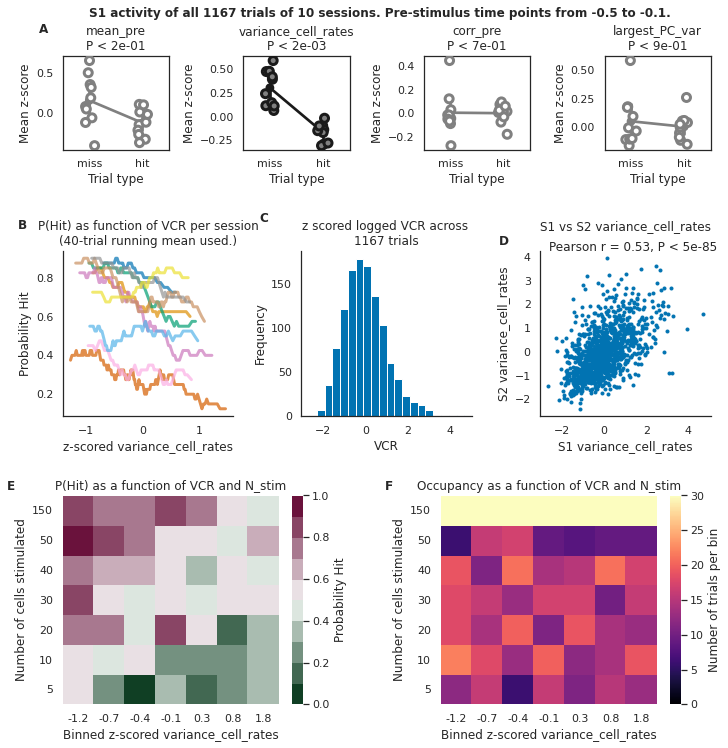

In [6]:
save_fig = False

fig = plt.figure(constrained_layout=False, figsize=(10, 10))
gs_top = fig.add_gridspec(ncols=4, nrows=1, bottom=0.82, top=0.95, right=0.95, left=0.05, 
                          hspace=0.3, wspace=0.7)
gs_middle = fig.add_gridspec(ncols=3, nrows=1, bottom=0.45, top=0.68, right=0.95, left=0.05, 
                             hspace=0.3, wspace=0.4)
gs_bottom = fig.add_gridspec(ncols=2, nrows=1, bottom=0.05, top=0.34, right=0.95, left=0.05, 
                             hspace=0.3, wspace=0.4)

cov_names = ['mean_pre', 'variance_cell_rates', 'corr_pre', 'largest_PC_var']
n_bins = 7
region = 's1'

ax_cov_scatter = {x: fig.add_subplot(gs_top[i_x]) for i_x, x in enumerate(cov_names)}
ax_vcr_lines = fig.add_subplot(gs_middle[0])
ax_vcr_hist = fig.add_subplot(gs_middle[1])
ax_vcr_s1s2 = fig.add_subplot(gs_middle[2])
ax_matrices = {i_x: fig.add_subplot(gs_bottom[i_x]) for i_x in range(2)}

pop.scatter_plots_covariates(cov_dicts=cov_dicts[region], cov_names=cov_names, 
                             ax_dict=ax_cov_scatter, lims=None, plot_type='pointplot')

pop.plot_accuracy_covar(cov_dicts=cov_dicts[region], zscore_covar=True,
                        one_sided_ws=20, ax=ax_vcr_lines, sessions=pas.sessions)

pop.hist_covar(ax=ax_vcr_hist, super_covar_df=super_covar_df_dict[region])

pop.scatter_covar_s1s2(super_covar_df_dict=super_covar_df_dict, ax=ax_vcr_s1s2)

pop.plot_density_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='fraction_hit', ax=ax_matrices[0])
pop.plot_density_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='occupancy', ax=ax_matrices[1])

assert len(pas.linear_models[0].session.filter_ps_time) == len(pas.linear_models[0].pre)
time_pre = pas.linear_models[0].session.filter_ps_time[pas.linear_models[0].pre]
str_time = f'Pre-stimulus time points from {np.round(time_pre[0], 2)} to {np.round(time_pre[-1], 2)}'
signature_time = f'{np.round(time_pre[0], 2)}_to_{np.round(time_pre[-1], 2)}'.replace('.', ',')
ax_cov_scatter[cov_names[0]].text(s=f'{region.upper()} activity of all {len(super_covar_df_dict[region])} trials of {len(pas.linear_models)} sessions. {str_time}.',
                                  x=0, y=1.2, fontdict={'weight': 'bold'});

ax_cov_scatter[cov_names[0]].text(s='A', x=-0.95, y=1, fontdict={'weight': 'bold'})
ax_vcr_lines.text(s='B', x=-2.2, y=1.05, fontdict={'weight': 'bold'})
ax_vcr_hist.text(s='C', x=-5, y=220, fontdict={'weight': 'bold'})
ax_vcr_s1s2.text(s='D', x=-5, y=4.5, fontdict={'weight': 'bold'})
ax_matrices[0].text(s='E', x=-1.8, y=7.2, fontdict={'weight': 'bold'})
ax_matrices[1].text(s='F', x=-1.8, y=7.2, fontdict={'weight': 'bold'})

if save_fig:
    plt.savefig(f'/home/tplas/repos/popping-off/figures/snr_overview/snr_overview_{region}_prestim{signature_time}_{len(super_covar_df_dict[region])}sessions.pdf',
                bbox_inches='tight')

WilcoxonResult(statistic=0.0, pvalue=0.001953125)


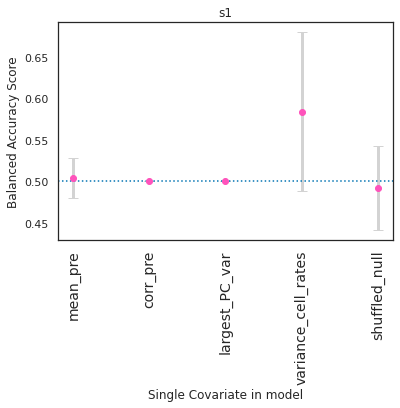

In [86]:
pas.single_covariate(region=region)
# save_figure(f'Figure4_singleCovarite_{region}')

In [41]:
cov_dicts['s1'][0].keys()

dict_keys(['trial_mean', 'delta_f', 'mean_pre', 'mean_post', 'corr_pre', 'corr_post', 'largest_singular_value', 'largest_PC_var', 'n_PCs_90', 'n_PCs_95', 'largest_factor_var', 'flat', 'trial_number', 'flattened_variance', 'variance_pop_mean', 'variance_cell_rates', 'mean_cell_variance', 'reward_history', 'n_cells_stimmed', 'lick', 'reward', 'jonas_metric', 'y'])

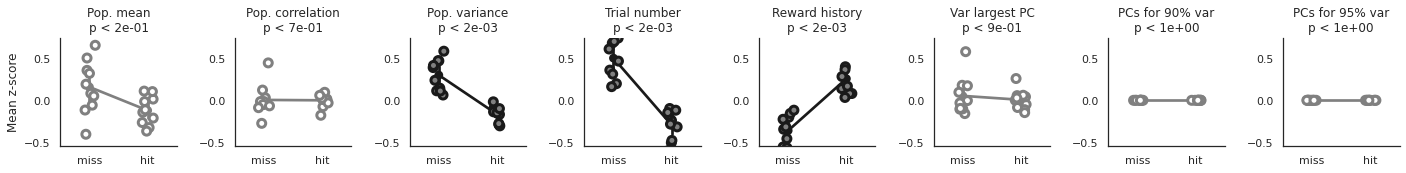

In [45]:
pop.scatter_plots_covariates(cov_dicts=cov_dicts['s1'], #cov_names=cov_names, 
#                              ax_dict=ax_cov_scatter, 
                             cov_names= ['mean_pre', 'corr_pre', 'variance_cell_rates',
                                         'trial_number', 'reward_history',
                                         'largest_PC_var',
                                         'n_PCs_90', 'n_PCs_95'],
                             lims=None, plot_type='pointplot')


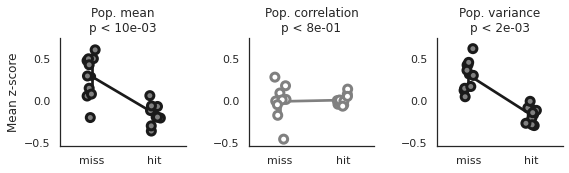

In [46]:
pop.scatter_plots_covariates(cov_dicts=cov_dicts['s2'], #cov_names=cov_names, 
#                              ax_dict=ax_cov_scatter, 
                             cov_names= ['mean_pre', 'corr_pre', 'variance_cell_rates'],
#                                          'largest_PC_var',
#                                          'n_PCs_90', 'n_PCs_95'],
                             lims=None, plot_type='pointplot')


TypeError: pre_stim_sketch() missing 1 required positional argument: 'session'

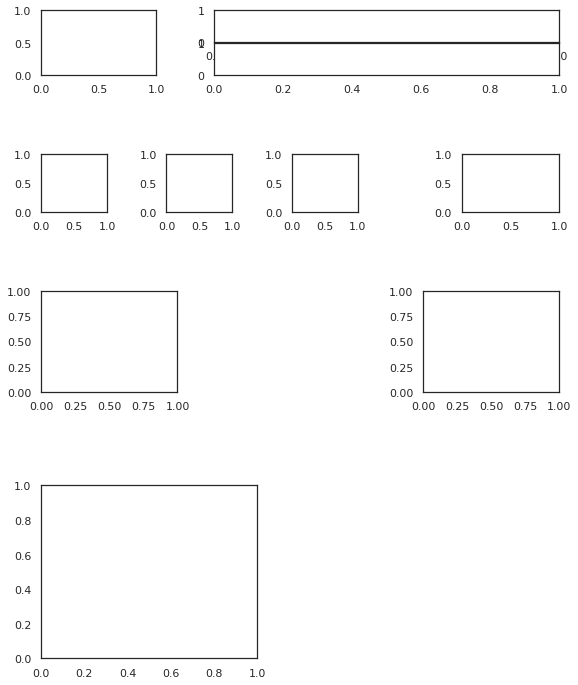

In [390]:
save_fig = False

fig = plt.figure(constrained_layout=False, figsize=(8, 10))
gs_sketch_left = fig.add_gridspec(ncols=1, nrows=1, bottom=0.86, top=0.95, right=0.25, left=0.05, 
                          hspace=0.3, wspace=0.7)
gs_sketch_right = fig.add_gridspec(ncols=1, nrows=2, bottom=0.86, top=0.95, right=0.95, left=0.35, 
                          hspace=0.05, wspace=0.7)
gs_top_left = fig.add_gridspec(ncols=3, nrows=1, bottom=0.67, top=0.75, right=0.6, left=0.05, 
                          hspace=0.3, wspace=0.9)
gs_top_right = fig.add_gridspec(ncols=1, nrows=1, bottom=0.67, top=0.75, right=0.95, left=0.78, 
                          hspace=0.3, wspace=0.7)
gs_middle = fig.add_gridspec(ncols=3, nrows=1, bottom=0.42, top=0.56, right=0.95, left=0.05, 
                             hspace=0.8, wspace=0.4)
gs_bottom = fig.add_gridspec(ncols=2, nrows=1, bottom=0.05, top=0.29, right=0.95, left=0.05, 
                             hspace=0.3, wspace=0.4)

cov_names = ['mean_pre', 'corr_pre', 'variance_cell_rates']
n_bins = 7
region = 's1'

ax_sketch = fig.add_subplot(gs_sketch_left[0])
ax_hit_vcr = fig.add_subplot(gs_sketch_right[0])
ax_miss_vcr = fig.add_subplot(gs_sketch_right[1])
ax_cov_scatter = {x: fig.add_subplot(gs_top_left[i_x]) for i_x, x in enumerate(cov_names)}
# ax_classifier = fig.add_subplot(gs_middle[0])
ax_vcr_s1s2 = fig.add_subplot(gs_top_right[0])
ax_vcr_lines = fig.add_subplot(gs_middle[0])
ax_collapsed_matrix = fig.add_subplot(gs_middle[2])
ax_matrix = fig.add_subplot(gs_bottom[0])

pop.pre_stim_sketch(ax=ax_sketch)
pop.firing_rate_dist(lm=pas.linear_models[0], region='s1', match_tnums=False, sort=False,
                      ax_hit=ax_hit_vcr, ax_miss=ax_miss_vcr)
pop.scatter_plots_covariates(cov_dicts=cov_dicts[region], cov_names=cov_names, 
                             ax_dict=ax_cov_scatter, lims=None, plot_type='pointplot')

pop.plot_accuracy_covar(cov_dicts=cov_dicts[region], zscore_covar=True, verbose=0,
                        one_sided_ws=20, ax=ax_vcr_lines, sessions=pas.sessions)
ax_vcr_lines.set_title('   P(Hit) decreases with pop. variance', y=1.1)
pop.scatter_covar_s1s2(super_covar_df_dict=super_covar_df_dict, ax=ax_vcr_s1s2)

pop.plot_collapsed_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='fraction_hit', ax=ax_collapsed_matrix, pool_trials=True)

pop.plot_density_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='fraction_hit', ax=ax_matrix,  plot_arrow=True)

assert len(pas.linear_models[0].session.filter_ps_time) == len(pas.linear_models[0].pre)
time_pre = pas.linear_models[0].session.filter_ps_time[pas.linear_models[0].pre]
str_time = f'Pre-stimulus time points from {np.round(time_pre[0], 2)} to {np.round(time_pre[-1], 2)}'
signature_time = f'{np.round(time_pre[0], 2)}_to_{np.round(time_pre[-1], 2)}'.replace('.', ',')

fig.align_ylabels(axs=[ax_cov_scatter['mean_pre'], ax_vcr_lines, ax_matrix])
# ax_cov_scatter[cov_names[0]].text(s=f'{region.upper()} activity of all {len(super_covar_df_dict[region])} trials of {len(pas.linear_models)} sessions. {str_time}.',
#                                   x=0, y=1.2, fontdict={'weight': 'bold'});

ax_cov_scatter[cov_names[0]].text(s='A', x=-2.1, y=4.15, fontdict={'weight': 'bold'})
ax_cov_scatter[cov_names[0]].text(s='B', x=4.3, y=4.15, fontdict={'weight': 'bold'})
ax_cov_scatter[cov_names[0]].text(s='C', x=-2.1, y=1.22, fontdict={'weight': 'bold'})
ax_cov_scatter[cov_names[0]].text(s='D', x=9.9, y=1.22, fontdict={'weight': 'bold'})
ax_cov_scatter[cov_names[0]].text(s='E', x=-2.1, y=-2, fontdict={'weight': 'bold'})
ax_cov_scatter[cov_names[0]].text(s='F', x=-2.1, y=-6.2, fontdict={'weight': 'bold'})
ax_cov_scatter[cov_names[0]].text(s='G', x=9.9, y=-2, fontdict={'weight': 'bold'})
ax_cov_scatter[cov_names[0]].text(s='H', x=8, y=-6.2, fontdict={'weight': 'bold'})

if save_fig:
    plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4_wo_schem.svg',
                bbox_inches='tight')

In [ ]:
save_fig = True
plot_pc_var = False

fig = plt.figure(constrained_layout=False, figsize=(11, 8))
gs_sketch_prestim = fig.add_gridspec(ncols=1, nrows=1, bottom=0.83, top=0.95, right=0.25, left=0.01, 
                          hspace=0.3, wspace=0.7)
gs_sketch_metrics = fig.add_gridspec(ncols=1, nrows=1, bottom=0.45, top=0.71, right=0.25, left=0.05, 
                          hspace=0.05, wspace=0.7)

gs_scatter = fig.add_gridspec(ncols=(4 if plot_pc_var else 3), nrows=1, bottom=0.83, top=0.95, right=0.95, left=0.35, 
                          hspace=0.3, wspace=0.9)
gs_scatter_s1s2 = fig.add_gridspec(ncols=1, nrows=1, bottom=0.53, top=0.71, right=0.5, left=0.35, 
                          hspace=0.3, wspace=0.7)
gs_acc_lines = fig.add_gridspec(ncols=1, nrows=1, bottom=0.53, top=0.71, right=0.78, left=0.6, 
                             hspace=0.8, wspace=0.4)
gs_bottom = fig.add_gridspec(ncols=3, nrows=1, bottom=0.05, top=0.3, right=0.95, left=0.05, 
                             hspace=0.3, wspace=0.6)

if plot_pc_var:
    cov_names = ['mean_pre', 'corr_pre', 'variance_cell_rates', 'largest_PC_var']
else:
    cov_names = ['mean_pre', 'corr_pre', 'variance_cell_rates']
n_bins = 7
region = 's1'

ax_sketch = fig.add_subplot(gs_sketch_prestim[0])
ax_hit_vcr = fig.add_subplot(gs_sketch_metrics[0])
# ax_miss_vcr = fig.add_subplot(gs_sketch_metrics[1])
ax_cov_scatter = {x: fig.add_subplot(gs_scatter[i_x]) for i_x, x in enumerate(cov_names)}

ax_vcr_s1s2 = fig.add_subplot(gs_scatter_s1s2[0])
ax_vcr_lines = fig.add_subplot(gs_acc_lines[0])
ax_collapsed_matrix = fig.add_subplot(gs_bottom[1])
ax_matrix = fig.add_subplot(gs_bottom[0])

pop.pre_stim_sketch(session=pas.linear_models[0].session, ax=ax_sketch)
# pop.firing_rate_dist(lm=pas.linear_models[0], region='s1', match_tnums=False, sort=False,
#                       ax_hit=ax_hit_vcr, ax_miss=ax_miss_vcr)
pop.covar_sketch(ax=ax_hit_vcr, plot_pc_var=plot_pc_var)
pop.scatter_plots_covariates(cov_dicts=cov_dicts[region], cov_names=cov_names, 
                             bonf_n_tests=8,   # use 8 because of supp fig 
                             ax_dict=ax_cov_scatter, lims=None, plot_type='pointplot')

pop.plot_accuracy_covar(cov_dicts=cov_dicts[region], zscore_covar=True, verbose=0,
                        one_sided_ws=20, ax=ax_vcr_lines, sessions=pas.sessions)
ax_vcr_lines.set_title('                P(Hit) decreases with pop. variance', y=1.1)
pop.scatter_covar_s1s2(super_covar_df_dict=super_covar_df_dict, ax=ax_vcr_s1s2)

pop.plot_collapsed_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='fraction_hit', ax=ax_collapsed_matrix, pool_trials=True)

pop.plot_density_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='fraction_hit', ax=ax_matrix,  plot_arrow=True)

assert len(pas.linear_models[0].session.filter_ps_time) == len(pas.linear_models[0].pre)
time_pre = pas.linear_models[0].session.filter_ps_time[pas.linear_models[0].pre]
str_time = f'Pre-stimulus time points from {np.round(time_pre[0], 2)} to {np.round(time_pre[-1], 2)}'
signature_time = f'{np.round(time_pre[0], 2)}_to_{np.round(time_pre[-1], 2)}'.replace('.', ',')

# ax_cov_scatter[cov_names[0]].text(s=f'{region.upper()} activity of all {len(super_covar_df_dict[region])} trials of {len(pas.linear_models)} sessions. {str_time}.',
#                                   x=0, y=1.2, fontdict={'weight': 'bold'});

if plot_pc_var:
    ax_cov_scatter[cov_names[0]].text(s='A', x=-8.6, y=1.17, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='B', x=-1.73, y=1.17, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='C', x=-1.73, y=-1.55, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='D', x=3.6, y=-1.55, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='E', x=-8.6, y=-5.78, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='F', x=-1.05, y=-5.78, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='G', x=6.2, y=-5.78, fontdict={'weight': 'bold'})
else:
    ax_cov_scatter[cov_names[0]].text(s='A', x=-6.3, y=1.17, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='B', x=-1.55, y=1.17, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='C', x=-1.55, y=-1.55, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='D', x=2.4, y=-1.55, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='E', x=-6.3, y=-5.78, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='F', x=-0.8, y=-5.78, fontdict={'weight': 'bold'})
    ax_cov_scatter[cov_names[0]].text(s='G', x=4.2, y=-5.78, fontdict={'weight': 'bold'})

fig.align_ylabels(axs=[ax_cov_scatter['mean_pre'], ax_vcr_s1s2])

if save_fig:
    plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4_wo_schem.svg',
                bbox_inches='tight')

In [528]:
## Combine svgs
sc.Figure('15.6cm', '12cm',
          sc.Panel(sc.SVG('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4_wo_schem.svg').scale(0.02).move(0, 0)),
          sc.Panel(sc.SVG('/home/tplas/repos/popping-off/figures/schematic_snr_fig_4.svg').scale(0.04).move(10.75, 7.5))
                  ).save('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4_complete.svg')

## Show svg
ip.SVG('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4_complete.svg')

## inspect variance and stuff

59
16


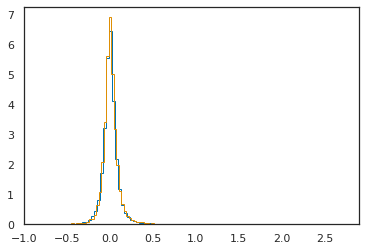

In [141]:
for tt in ['hit', 'miss']:
    tt_ind = np.where(outcome_arr == tt)[0]
    print(len(tt_ind))
    plt.hist(data_use_mat_norm_s1[:, tt_ind, :][:, :, 48:61].mean(2).ravel(), bins=100, density=True,
             histtype='step');

90
58


No handles with labels found to put in legend.


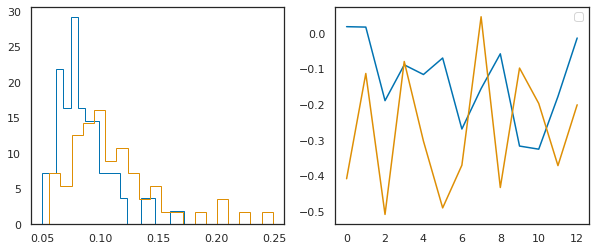

In [306]:
i_session = 4
vcr_arr = {}
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
for tt in ['hit', 'miss']:
    model = pas.linear_models[i_session]
    tt_ind = np.where(model.session.outcome == tt)[0]
    print(len(tt_ind))
    data = model.flu[model.region_map['s1'], :, :][:, tt_ind, :][:, :, pas.linear_models[i_session].pre].mean(2)
    vcr_arr[tt] = np.var(data, 0)
    
    inds_vcr_sort = np.argsort(vcr_arr[tt])
    half_way_point = int(len(inds_vcr_sort) / 2)
    
#     plt.hist(data[:, :].mean(1), bins=20, density=True,
#              histtype='step', label=tt);
#     
#     plt.hist(data[:, inds_vcr_sort[:half_way_point]].ravel(), bins=50, density=True,
#              histtype='step', label=tt + '_low');
#     plt.hist(data[:, inds_vcr_sort[half_way_point:]].ravel(), bins=50, density=True,
#              histtype='step', label=tt + '_high');
    ax[0].hist(vcr_arr[tt], bins=20, density=True, histtype='step', label=tt)
    
    
    ax[1].plot(model.flu[model.region_map['s1'], :, :][4, :, :][tt_ind, :][10, :][model.pre])
#     plt.xlabel('trial av DF/F activity')
# plt.yscale('log')
plt.legend()
# plt.xlim([-1, 1.2])

In [303]:
model.flu[model.region_map['s1'], :, :][3, :, :][tt_ind, :][10, :].shape

(300,)

In [130]:
pas.linear_models[0].session.filter_ps_time[pas.linear_models[0].pre]

array([-0.5       , -0.46666667, -0.43333333, -0.4       , -0.36666667,
       -0.33333333, -0.3       , -0.26666667, -0.23333333, -0.2       ,
       -0.16666667, -0.13333333, -0.1       ])

In [121]:
(pas.linear_models[0].session.behaviour_trials == pas.linear_models[0].flu).all()

True

# Supp with scatter plots 

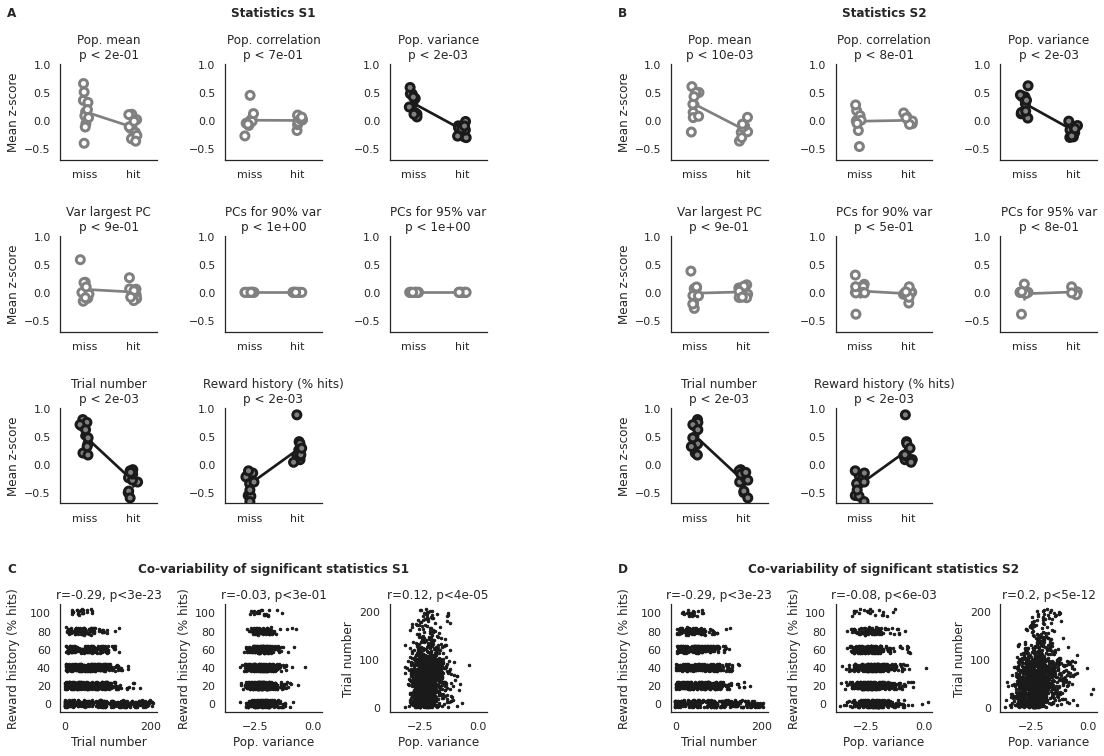

In [555]:
cov_names = ['mean_pre', 'corr_pre', 'variance_cell_rates',
             'largest_PC_var', 'n_PCs_90', 'n_PCs_95',
             'trial_number', 'reward_history']
save_fig = False


fig = plt.figure(constrained_layout=False, figsize=(16, 10))
gs_pointplot = {}
gs_pointplot['s1'] = fig.add_gridspec(ncols=3, nrows=3, bottom=0.34, top=0.95, right=0.42, left=0.05, 
                          hspace=0.8, wspace=0.7)

gs_pointplot['s2'] = fig.add_gridspec(ncols=3, nrows=3, bottom=0.34, top=0.95, right=0.95, left=0.58, 
                          hspace=0.8, wspace=0.7)

gs_scatter = {}
gs_scatter['s1'] = fig.add_gridspec(ncols=3, nrows=1, bottom=0.05, top=0.2, right=0.42, left=0.05, 
                          hspace=0.8, wspace=0.7)

gs_scatter['s2'] = fig.add_gridspec(ncols=3, nrows=1, bottom=0.05, top=0.2, right=0.95, left=0.58, 
                          hspace=0.8, wspace=0.7)

ax_dict, ax_scatter = {}, {}
for i_reg, reg in enumerate(['s1', 's2']):
    ax_dict[reg] = {}
    icov = 0
    for irow in range(3):
        for icol in range(3):
            if icov < len(cov_names):
                ax_dict[reg][cov_names[icov]] = fig.add_subplot(gs_pointplot[reg][irow, icol])
                icov += 1
            
            
    pop.scatter_plots_covariates(cov_dicts=cov_dicts[reg], 
                             ax_dict=ax_dict[reg], 
                             cov_names=cov_names,
                             lims=None, plot_type='pointplot')

    ax_scatter[reg] = {k: fig.add_subplot(gs_scatter[reg][k]) for k in range(3)}
    pop.plot_scatter_all_trials_two_covars(cov_dicts=cov_dicts, 
                                       covar_1='trial_number',
                                       covar_2='reward_history',
                                          ax=ax_scatter[reg][0], region=reg)
    
    pop.plot_scatter_all_trials_two_covars(cov_dicts=cov_dicts, 
                                       covar_1='variance_cell_rates',
                                       covar_2='reward_history',
                                          ax=ax_scatter[reg][1], region=reg)
    
    pop.plot_scatter_all_trials_two_covars(cov_dicts=cov_dicts, 
                                       covar_1='variance_cell_rates',
                                       covar_2='trial_number',
                                          ax=ax_scatter[reg][2], region=reg)
    
    for icov, covname in enumerate(cov_names):
        if icov % 3 == 0:
            ax_dict[reg][covname].set_ylabel('Mean z-score')
        ax_dict[reg][covname].set_ylim([-0.7, 1])
        
    ax_dict[reg]['corr_pre'].annotate(text=f'Statistics {reg.upper()}',
                                      xy=(0.5, 1.5), xycoords='axes fraction',
                                      weight='bold', ha='center')
    ax_scatter[reg][1].annotate(text=f'Co-variability of significant statistics {reg.upper()}',
                                      xy=(0.5, 1.3), xycoords='axes fraction',
                                      weight='bold', ha='center')
    
    fig.align_ylabels(axs=[ax_dict[reg]['mean_pre'], ax_scatter[reg][0]])
    
ax_dict['s1']['mean_pre'].annotate(text='A',
                                  xy=(-0.5, 1.5), xycoords='axes fraction',
                                  weight='bold', ha='center')
ax_dict['s2']['mean_pre'].annotate(text='B',
                                  xy=(-0.5, 1.5), xycoords='axes fraction',
                                  weight='bold', ha='center')
ax_scatter['s1'][0].annotate(text='C',
                                  xy=(-0.5, 1.3), xycoords='axes fraction',
                                  weight='bold', ha='center')
ax_scatter['s2'][0].annotate(text='D',
                                  xy=(-0.5, 1.3), xycoords='axes fraction',
                                  weight='bold', ha='center')
for ii in range(3): 
    pop.equal_lims_two_axs(ax1=ax_scatter['s1'][ii], ax2=ax_scatter['s2'][ii])
if save_fig:
    plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4_supp_scatters.pdf',
                bbox_inches='tight')